1.Caricamento del dataset

Carica del dataset NSL-KDD (train e test) fornendo i nomi ufficiali delle colonne.
Il dataset contiene 41 feature, più la colonna label (classe) e difficulty (livello di difficoltà dell’istanza).

Output atteso:

La forma delle tabelle (train.shape, test.shape)  rispettivamente ~125k e ~22k righe.

Le prime 5 righe (head()) con i nomi delle colonne assegnati correttamente.

In [8]:
import pandas as pd

# Nomi ufficiali delle colonne NSL-KDD
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
    "root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
    "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate","label","difficulty"
]

# Caricamento dei dati
train = pd.read_csv("data/nsl-kdd/KDDTrain+.TXT", names=columns)
test = pd.read_csv("data/nsl-kdd/KDDTest+.TXT", names=columns)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (125973, 43)
Test shape: (22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


2. Distribuzione delle classi (multiclasse)

analizzato la colonna label, che rappresenta la classe di ciascun record.
Le classi includono sia normal sia decine di tipi di attacco (es. neptune, smurf, satan, ecc.).

.

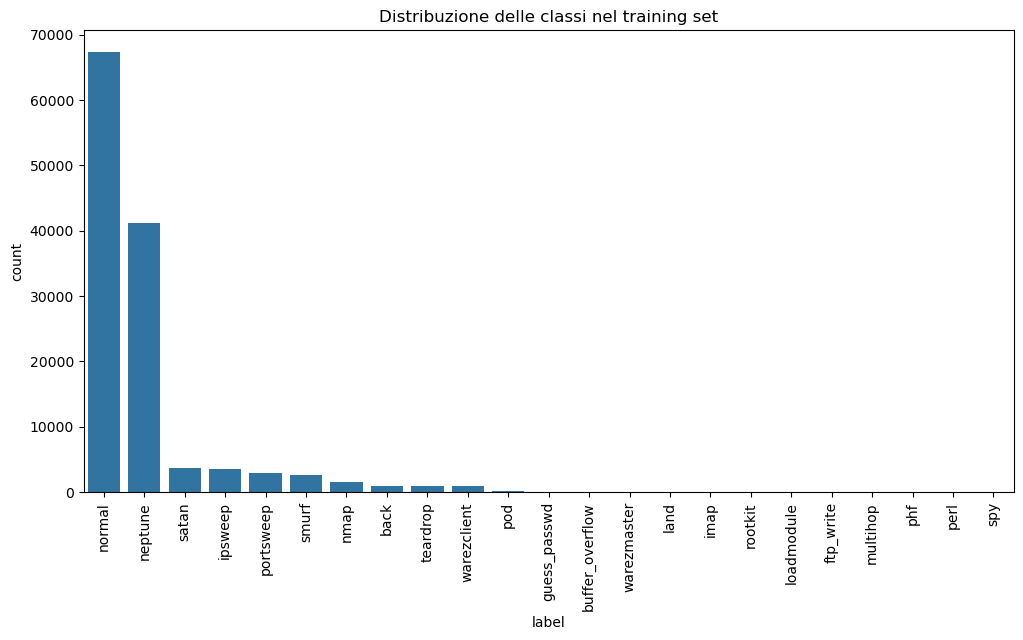

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=train, x="label", order=train["label"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribuzione delle classi nel training set")
plt.show()


Output atteso:

Un grafico a barre (countplot) con la distribuzione di tutte le classi.

Risultato: dataset fortemente sbilanciato → alcune classi (es. neptune, smurf) hanno migliaia di istanze, mentre altre pochissime

3. Etichetta binaria (attack vs normal)

Per semplificare il problema vi è introdotto una nuova colonna binary_label:

normal → 0

qualsiasi altro attacco → 1

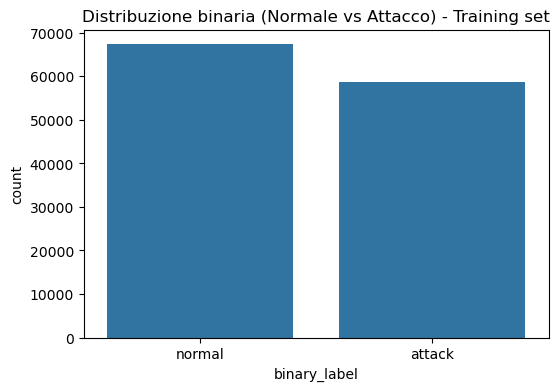

binary_label
normal    53.458281
attack    46.541719
Name: proportion, dtype: float64


In [10]:
# colonna binaria: normal vs attack
train["binary_label"] = train["label"].apply(lambda x: "normal" if x == "normal" else "attack")
test["binary_label"] = test["label"].apply(lambda x: "normal" if x == "normal" else "attack")

# Distribuzione delle due classi nel training set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=train, x="binary_label")
plt.title("Distribuzione binaria (Normale vs Attacco) - Training set")
plt.show()

# Percentuali
print(train["binary_label"].value_counts(normalize=True) * 100)


Output atteso:

Grafico a barre con due sole classi (normal, attack).

Percentuali di distribuzione → confermano che gli attacchi sono più numerosi dei record normali.

4. Statistiche descrittive delle feature numeriche

Utilizzato describe() per ottenere le statistiche principali (media, deviazione standard, min, max, quartili) di tutte le variabili numeriche.

           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.00000

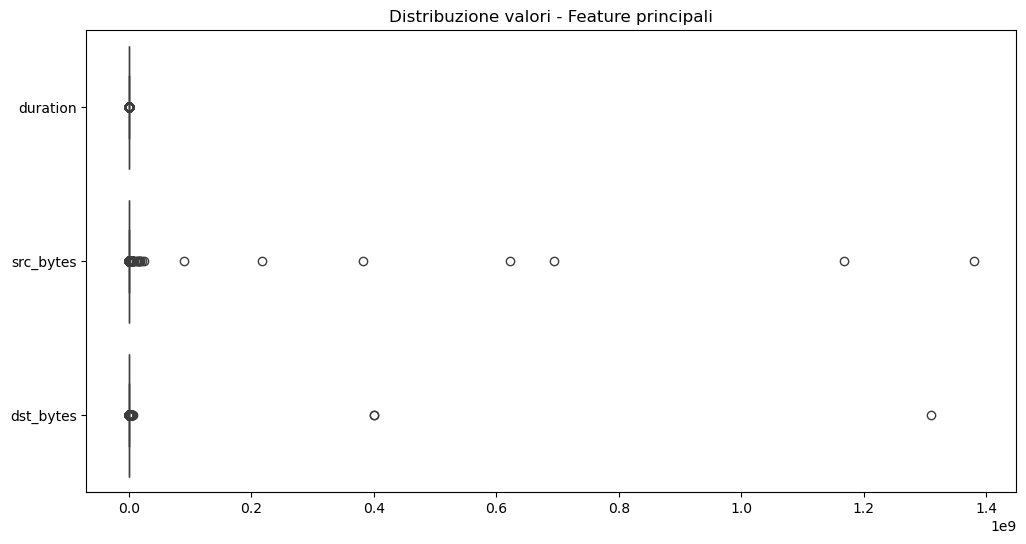

In [11]:
# Statistiche descrittive delle feature numeriche
desc = train.describe()
print(desc)

# si mostrano solo alcune colonne chiave
cols_to_check = ["duration", "src_bytes", "dst_bytes", "count", "srv_count"]
print(train[cols_to_check].describe())

# Boxplot per vedere la distribuzione di alcune variabili
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=train[["duration","src_bytes","dst_bytes"]], orient="h")
plt.title("Distribuzione valori - Feature principali")
plt.show()


Output atteso:

Tabella con le statistiche di base.

Boxplot di alcune feature chiave (duration, src_bytes, dst_bytes).

Risultato: presenza di outlier → alcuni record hanno valori molto più alti rispetto alla media.

5. Correlazione tra feature numeriche (heatmap)

Calcolato la matrice di correlazione delle variabili numeriche e l’abbiamo visualizzata con una heatmap.

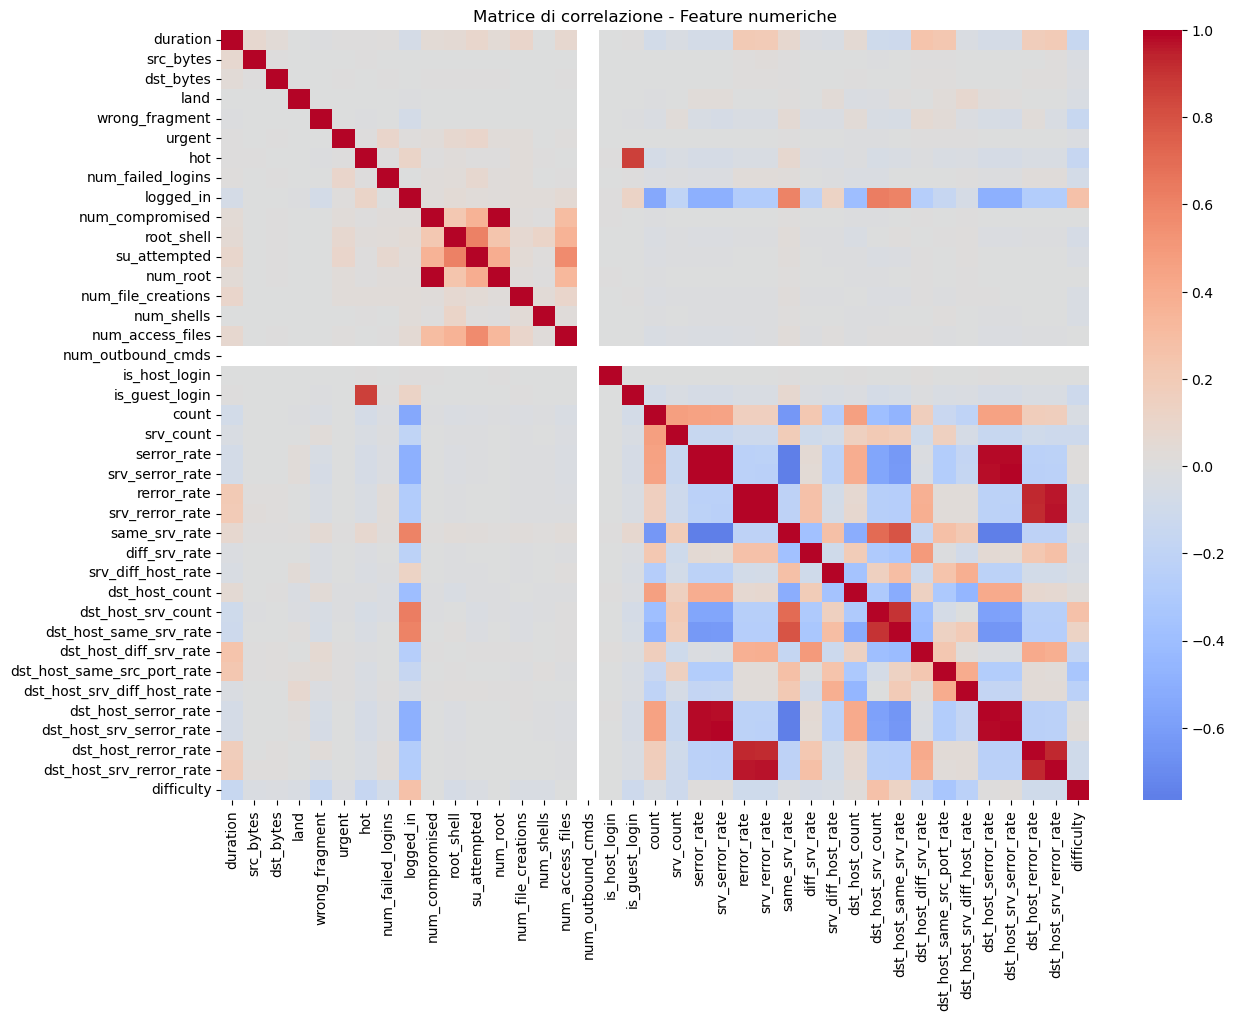

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcoliamo la correlazione solo sulle colonne numeriche
corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matrice di correlazione - Feature numeriche")
plt.show()


Una heatmap con:

valori vicini a 1.0 → correlazione positiva forte (due feature si comportano in modo simile),

valori vicini a -1.0 → correlazione negativa forte,

valori vicini a 0 → variabili indipendenti.

🔹 Interpretazione

Se vi sono feature molto correlate (es. srv_serror_rate e serror_rate), significa che si possono ridurre la dimensionalità o rimuovere ridondanze.


Output atteso:

Mappa a colori con valori tra -1 e +1.

Alcune feature risultano fortemente correlate (es. serror_rate ↔ srv_serror_rate).

Questo suggerisce la presenza di ridondanza tra variabili → utile da citare nella relazione.

6. Preprocessing dataset

Preparato i dati per l’addestramento ML:

Encoding delle variabili categoriche (protocol_type, service, flag).

Conversione dell’etichetta binaria in numeri (normal=0, attack=1).

Rimozione delle colonne non necessarie (label, difficulty).

Standardizzazione delle feature con StandardScaler.

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = train.copy()

# Encoding delle feature categoriche
encoder = LabelEncoder()
for col in ["protocol_type", "service", "flag"]:
    df[col] = encoder.fit_transform(df[col])

# Encoding dell'etichetta binaria
df["binary_label"] = df["binary_label"].apply(lambda x: 0 if x == "normal" else 1)

# Selezione X (feature) e y (target)
X = df.drop(columns=["label", "difficulty", "binary_label"])
y = df["binary_label"]

# Normalizzazione / scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape features:", X_scaled.shape)
print("Shape target:", y.shape)


Shape features: (125973, 41)
Shape target: (125973,)


Categoriche (protocol_type, service, flag) → trasformate in numeri.

Etichetta binaria (normal=0, attack=1).

Rimozione colonne non utili (label = multiclass, difficulty = metadato).

Scaling numerico → tutte le feature sono sulla stessa scala (necessario per molti modelli).

🔹 Output atteso

X_scaled = matrice numerica (feature pronte per ML).

y = vettore target binario (0 o 1).

# 📊 Conclusioni dell’Analisi Dati – NSL-KDD Dataset

L’attività di analisi esplorativa condotta sul dataset **NSL-KDD** ha avuto un duplice obiettivo:  
1. fornire una comprensione approfondita della struttura e delle proprietà dei dati;  
2. individuare le criticità e le trasformazioni necessarie affinché il dataset possa essere impiegato in modo efficace in modelli di *Machine Learning* per la realizzazione di un sistema di **Intrusion Detection (IDS)**.

---

## 1. Struttura e distribuzione delle classi
L’analisi preliminare ha confermato che il dataset contiene **41 variabili descrittive**, di natura eterogenea (numeriche, categoriche, contatori, frequenze), e due colonne aggiuntive:  
- `label` → etichetta multiclass che identifica traffico normale o tipologie specifiche di attacco (DoS, Probe, R2L, U2R).  
- `difficulty` → indice della complessità dell’istanza, utile per studi avanzati ma non necessario in fase di training.  

La distribuzione delle classi risulta **fortemente sbilanciata**: alcune tipologie di attacco, come *neptune* e *smurf*, sono sovrarappresentate, mentre altre, quali *spy* o *perl*, compaiono in quantità marginali.  

### Motivazione metodologica
Lo sbilanciamento è un fenomeno noto nei dataset di sicurezza informatica: gli attacchi reali seguono tipicamente una distribuzione “long tail”, dove poche famiglie sono molto diffuse e molte altre sono rare.  
In ambito di *data analysis*, è essenziale rilevare questo aspetto per evitare che i modelli di classificazione risultino **biased** verso le classi maggioritarie.  

### Scelta progettuale
In questa fase è stata introdotta un’etichetta **binaria** (`binary_label`: *normal* vs *attack*) al fine di ridurre la complessità del problema e focalizzarsi sull’obiettivo primario di un IDS: distinguere il traffico lecito da quello malevolo.  
Tale approccio consente inoltre di ottenere valutazioni più stabili, rinviando a una fase successiva l’eventuale estensione al problema **multi-classe**.

---

## 2. Statistiche descrittive delle variabili numeriche
Le statistiche di base (medie, deviazioni standard, quartili) hanno mostrato valori con range molto estesi e presenza di numerosi **outlier**. Ad esempio, feature come `src_bytes` e `dst_bytes` presentano distribuzioni altamente asimmetriche, con valori eccezionalmente elevati in corrispondenza di specifiche istanze di attacco.

### Motivazione metodologica
In un contesto di sicurezza, gli outlier non rappresentano rumore da eliminare, bensì spesso corrispondono a **pattern anomali reali** (e.g., attacchi DoS caratterizzati da volumi di traffico anomali).  
È quindi importante **preservarli** come indizi utili per la classificazione, ma al contempo ridurre gli effetti distorsivi delle scale diverse mediante tecniche di normalizzazione.

### Scelta progettuale
Si è optato per l’applicazione di uno **StandardScaler**, al fine di portare tutte le variabili numeriche su una scala comparabile (media = 0, deviazione standard = 1).  
Ciò risulta particolarmente rilevante per algoritmi basati su distanze o gradienti, come regressione logistica, SVM o reti neurali.

---

## 3. Correlazioni tra variabili
La matrice di correlazione ha evidenziato la presenza di coppie di feature altamente collegate (e.g., `serror_rate` ↔ `srv_serror_rate`, `rerror_rate` ↔ `srv_rerror_rate`).  
Questa ridondanza è tipica di dataset costruiti su metriche di rete, dove variabili derivate condividono l’informazione di base.

### Motivazione metodologica
Feature fortemente correlate possono determinare:  
- inefficienza computazionale (modelli più complessi senza reale incremento informativo);  
- rischio di *multicollinearità* in algoritmi parametrici (regressione, reti neurali), con conseguente perdita di interpretabilità.  

### Possibili miglioramenti
In prospettiva, sarà opportuno introdurre tecniche di **feature selection** (es. importanza delle feature in Random Forest, regressione L1) o **riduzione dimensionale** (es. PCA) per eliminare ridondanze preservando la capacità predittiva.

---

## 4. Preprocessing complessivo
Le operazioni di preprocessing hanno incluso:  
- encoding delle variabili categoriche (`protocol_type`, `service`, `flag`) → necessarie poiché gli algoritmi di ML richiedono input numerici;  
- encoding binario della variabile target (`normal`=0, `attack`=1);  
- standardizzazione delle variabili numeriche.  

### Motivazione metodologica
Tali trasformazioni garantiscono che il dataset sia in una forma **consistente e idonea** all’addestramento di modelli di *Machine Learning*, evitando bias legati a scale eterogenee o input non numerici.

---

# ✅ Sintesi critica
L’analisi ha evidenziato i seguenti punti chiave:
1. **Sbilanciamento marcato delle classi** → richiederà metriche adeguate (precision, recall, f1-score) e potenzialmente tecniche di riequilibrio (SMOTE, undersampling).  
2. **Outlier informativi** → non eliminati, ma trattati tramite scaling.  
3. **Ridondanza tra feature** → opportuno considerare future strategie di riduzione dimensionale.  
4. **Preprocessing coerente** → encoding e scaling hanno reso i dati utilizzabili per algoritmi ML moderni.

---

# 🔮 Prospettive di miglioramento
- **Gestione dello sbilanciamento**: impiego di tecniche di *resampling* o approcci di *cost-sensitive learning*.  
- **Analisi multi-classe**: estensione per distinguere le quattro categorie principali (DoS, Probe, R2L, U2R).  
- **Feature engineering**: creazione di variabili derivate (es. rapporti tra `src_bytes` e `dst_bytes`, frequenze normalizzate).  
- **Riduzione dimensionale**: eliminazione delle variabili fortemente correlate per migliorare robustezza ed efficienza.  

---

## 📌 Conclusione finale
Il dataset NSL-KDD, dopo la fase di analisi e preprocessing, risulta **pronto per l’addestramento di modelli di Machine Learning**.  


